<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv",header=None ,names=col_names)

In [14]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)


In [20]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 25,  37]])

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

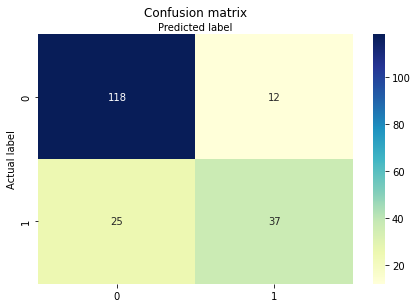

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7551020408163265
Recall: 0.5967741935483871


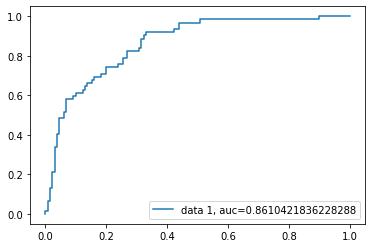

In [24]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [26]:
#using ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
from tensorflow.keras.utils import to_categorical

In [29]:
Y_train=to_categorical(y_train)


In [38]:
model=Sequential()

In [52]:
model=Sequential([
                  Dense(units=16,input_shape=(7,),activation='relu'),
                  Dense(units=32,activation='relu'),
                  Dense(units=2,activation='softmax')
])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                128       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 738
Trainable params: 738
Non-trainable params: 0
_________________________________________________________________


In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [56]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
history=model.fit(x=X_train,y=Y_train,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)


Epoch 1/30
52/52 - 1s - loss: 0.7869 - accuracy: 0.3089 - val_loss: 0.7495 - val_accuracy: 0.3276 - 697ms/epoch - 13ms/step
Epoch 2/30
52/52 - 0s - loss: 0.7610 - accuracy: 0.3649 - val_loss: 0.7248 - val_accuracy: 0.4310 - 90ms/epoch - 2ms/step
Epoch 3/30
52/52 - 0s - loss: 0.7383 - accuracy: 0.4440 - val_loss: 0.7029 - val_accuracy: 0.5345 - 87ms/epoch - 2ms/step
Epoch 4/30
52/52 - 0s - loss: 0.7180 - accuracy: 0.5290 - val_loss: 0.6833 - val_accuracy: 0.6034 - 97ms/epoch - 2ms/step
Epoch 5/30
52/52 - 0s - loss: 0.6998 - accuracy: 0.5888 - val_loss: 0.6646 - val_accuracy: 0.6724 - 104ms/epoch - 2ms/step
Epoch 6/30
52/52 - 0s - loss: 0.6831 - accuracy: 0.6216 - val_loss: 0.6472 - val_accuracy: 0.7069 - 101ms/epoch - 2ms/step
Epoch 7/30
52/52 - 0s - loss: 0.6679 - accuracy: 0.6255 - val_loss: 0.6322 - val_accuracy: 0.7241 - 108ms/epoch - 2ms/step
Epoch 8/30
52/52 - 0s - loss: 0.6545 - accuracy: 0.6371 - val_loss: 0.6183 - val_accuracy: 0.7241 - 102ms/epoch - 2ms/step
Epoch 9/30
52/52 -

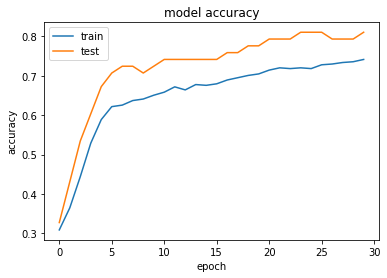

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
predictions=model.predict(x=X_test,batch_size=10,verbose=0)

In [61]:
for i in predictions:
  print(i)

[0.39095238 0.60904765]
[0.7950659  0.20493418]
[0.85631025 0.14368977]
[0.47135466 0.5286453 ]
[0.8828567  0.11714328]
[0.93261135 0.06738863]
[0.42139915 0.5786009 ]
[0.3699184 0.6300816]
[0.58871317 0.41128683]
[0.5142003 0.4857997]
[0.45205963 0.5479403 ]
[0.38361818 0.6163818 ]
[0.69272417 0.30727583]
[0.86077976 0.1392202 ]
[0.770026   0.22997396]
[0.84195    0.15805002]
[0.47368532 0.52631474]
[0.9528073 0.0471927]
[0.51606095 0.48393908]
[0.60167515 0.39832482]
[0.41907334 0.58092666]
[0.70695823 0.29304174]
[0.83843225 0.16156769]
[0.86781853 0.13218154]
[0.9066521  0.09334795]
[0.7726 0.2274]
[0.9573464  0.04265356]
[0.3207094  0.67929053]
[0.8862794  0.11372062]
[0.8322911 0.1677089]
[0.5768317  0.42316827]
[0.7290197  0.27098033]
[0.8423365  0.15766354]
[0.50087893 0.49912107]
[0.8637907  0.13620935]
[0.5156605  0.48433942]
[0.6292796 0.3707204]
[0.8859972  0.11400285]
[0.62323415 0.3767659 ]
[0.5340978 0.4659022]
[0.7321121 0.2678879]
[0.80309606 0.19690397]
[0.7605683  0.

In [62]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [63]:
for j in rounded_predictions:
  print(j)

1
0
0
1
0
0
1
1
0
0
1
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0


In [66]:
y_test.shape

(192,)

In [67]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [68]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [69]:
from sklearn.metrics import plot_confusion_matrix
cm_plot_labels = ['no_side_effects','had_side_effects']
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[121   9]
 [ 39  23]]


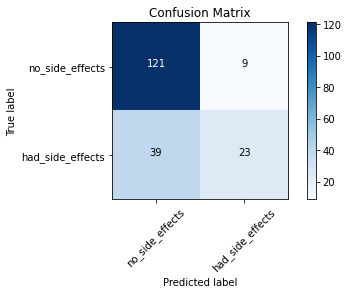

In [70]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')